# Importando as bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression
import yfinance as yf

%matplotlib inline

# Carregando meus dados

In [2]:
ibov = pdr.get_data_yahoo('^BVSP', start='2014-09-16', end='2021-08-26')
btc = pdr.get_data_yahoo('BTC-USD', start='2014-09-16', end='2021-08-26')

# Criando um filtro inicial

In [3]:
dias_negociacao = ibov.index
btc = btc[btc.index.isin(dias_negociacao)]

In [4]:
len(btc), len(ibov)

(1714, 1716)

In [5]:
dias_negociacao_btc = btc.index
ibov = ibov[ibov.index.isin(dias_negociacao_btc)]

In [6]:
len(btc), len(ibov)

(1714, 1714)

**Obs.:** Como o índice Bovespa e o Bitcoin possuem dias diferentes de negociação, utilizei esse formato simples para igualar as duas séries.

# Visualizando meus dados de interesse

Text(0, 0.5, 'BTC')

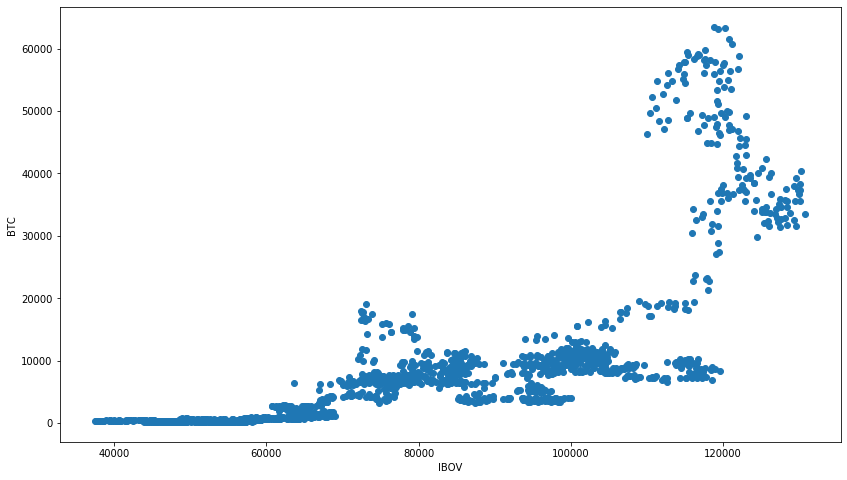

In [7]:
plt.figure(figsize=(14,8))
plt.scatter(ibov['Close'], btc['Close'])
plt.xlabel('IBOV')
plt.ylabel('BTC')

# Criando o modelo - Regressão Linear

In [8]:
# Definindo minhas variáveis X e y para aplicação do modelo
X = ibov['Close'].values.reshape(-1,1)
y = btc['Close'].values.reshape(-1,1)

# Armazenando o meu modelo e fazendo o ajuste para o meu conjunto de dados
Model = LinearRegression()
Model = Model.fit(X, y)

# Realizando a predição e armazenando os resultados
pred = Model.predict(X)

# Visualizando meus dados com o resultado do modelo

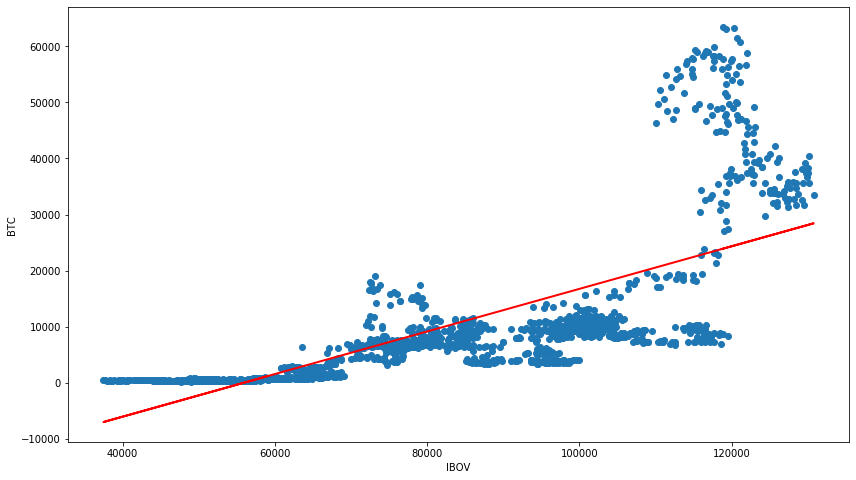

In [9]:
plt.figure(figsize=(14,8))

plt.scatter(X, y)
plt.plot(X, pred, color='red', linewidth=2)
plt.xlabel('IBOV')
plt.ylabel('BTC')

plt.show()

# Checando os coeficientes

In [10]:
print("O valor do intercepto é: ", Model.intercept_[0])
print("O coeficiente é: ", Model.coef_[0][0])

O valor do intercepto é:  -21270.15208464302
O coeficiente é:  0.38001458568622565


In [11]:
r_squared = Model.score(X, y)
print(f'Coeficiente de Determinação (R2): {r_squared}')

Coeficiente de Determinação (R2): 0.5397801446695032
